# Lecture 02 Review

## Seach

### Representation of Graph

#### Get and parse city coordinations

In [1]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

[Python Regular Expression Reference](https://docs.python.org/3/library/re.html)

In [2]:
import re

city = "{name:'澳门', geoCoord:[113.54, 22.19]}"

name_pattern = re.compile(r"name:'(\w+)'")
city_name = name_pattern.findall(city)[0]

coord_pattern = re.compile(r'geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]') # []是保留字符，需要进行转义
city_coord = coord_pattern.findall(city)

city_name, city_coord

('澳门', [('113.54', '22.19')])

In [3]:
import re

def get_city_info(city_coordination:str):
    """
    parse city coordinations source and return city dict.
    """
    city_location = {}

    for line in city_coordination.split('\n'):
        if line.strip() == '': continue
        if line.startswith('//'): continue

        name_pattern = re.compile(r"name:'(\w+)'")
        name = name_pattern.findall(line)[0]

        coord_pattern = re.compile(r'geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]')
        coord = coord_pattern.findall(line)[0]

        coord = tuple(map(lambda x: float(x), coord))

        city_location[name] = coord

    return city_location

In [4]:
city_info = get_city_info(coordination_source)
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

#### Compute distance between cities

TODO: how to calculate distance of coordination?

In [5]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [6]:
def get_city_distance(source, dest, city_info=city_info):
    return geo_distance(city_info[source], city_info[dest])

In [7]:
get_city_distance('北京', '上海')

727.52769688981

#### Draw the graph

In [8]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [9]:
%matplotlib inline

[networkx document](https://networkx.github.io/documentation/stable/)

In [10]:
import networkx as nx

In [11]:
city_graph = nx.Graph()
city_graph.add_nodes_from(city_info.keys())

In [12]:
# city_graph?

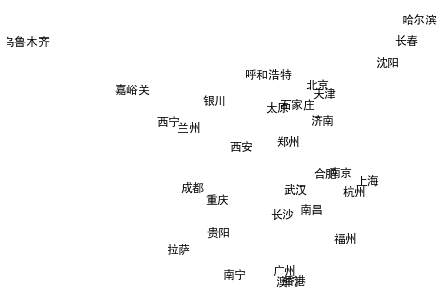

In [22]:
nx.draw(city_graph, city_info, with_labels=True, node_size=0)

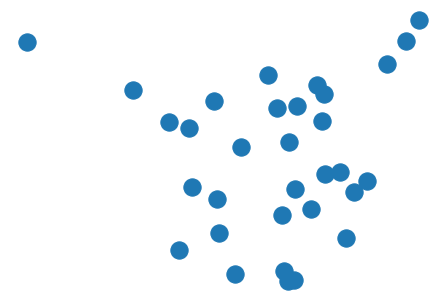

In [21]:
nx.draw(city_graph, city_info)

In [15]:
# nx.draw?

**Build connections**

In [23]:
city_info

{'兰州': (103.73, 36.03),
 '嘉峪关': (98.17, 39.47),
 '西宁': (101.74, 36.56),
 '成都': (104.06, 30.67),
 '石家庄': (114.48, 38.03),
 '拉萨': (102.73, 25.04),
 '贵阳': (106.71, 26.57),
 '武汉': (114.31, 30.52),
 '郑州': (113.65, 34.76),
 '济南': (117.0, 36.65),
 '南京': (118.78, 32.04),
 '合肥': (117.27, 31.86),
 '杭州': (120.19, 30.26),
 '南昌': (115.89, 28.68),
 '福州': (119.3, 26.08),
 '广州': (113.23, 23.16),
 '长沙': (113.0, 28.21),
 '沈阳': (123.38, 41.8),
 '长春': (125.35, 43.88),
 '哈尔滨': (126.63, 45.75),
 '太原': (112.53, 37.87),
 '西安': (108.95, 34.27),
 '北京': (116.46, 39.92),
 '上海': (121.48, 31.22),
 '重庆': (106.54, 29.59),
 '天津': (117.2, 39.13),
 '呼和浩特': (111.65, 40.82),
 '南宁': (108.33, 22.84),
 '银川': (106.27, 38.47),
 '乌鲁木齐': (87.68, 43.77),
 '香港': (114.17, 22.28),
 '澳门': (113.54, 22.19)}

In [107]:
def build_connection(city_info, threshold=300):
    city_connections = {}
    cities = city_info.keys()

    for c1 in cities:
        for c2 in cities:
            if c1 == c2: continue

            if get_city_distance(c1, c2) < threshold:
                city_connections.setdefault(c1, [])
                city_connections[c1].append(c2)

    return city_connections

In [108]:
build_connection(city_info)

{'兰州': ['西宁', '成都', '银川'],
 '西宁': ['兰州', '成都', '拉萨'],
 '成都': ['兰州', '西宁', '拉萨', '重庆'],
 '石家庄': ['郑州', '济南', '太原', '北京'],
 '拉萨': ['西宁', '成都'],
 '贵阳': ['重庆', '南宁'],
 '武汉': ['郑州', '南昌', '长沙'],
 '郑州': ['石家庄', '武汉', '长沙', '太原'],
 '济南': ['石家庄', '合肥', '北京', '天津'],
 '南京': ['合肥', '杭州'],
 '合肥': ['济南', '南京', '南昌'],
 '杭州': ['南京', '福州', '上海'],
 '南昌': ['武汉', '合肥'],
 '福州': ['杭州'],
 '广州': ['长沙', '香港', '澳门'],
 '长沙': ['武汉', '郑州', '广州', '香港', '澳门'],
 '沈阳': ['长春'],
 '长春': ['沈阳', '哈尔滨'],
 '哈尔滨': ['长春'],
 '太原': ['石家庄', '郑州', '呼和浩特'],
 '北京': ['石家庄', '济南', '天津'],
 '上海': ['杭州'],
 '重庆': ['成都', '贵阳', '银川'],
 '天津': ['济南', '北京'],
 '呼和浩特': ['太原'],
 '南宁': ['贵阳'],
 '银川': ['兰州', '重庆'],
 '香港': ['广州', '长沙', '澳门'],
 '澳门': ['广州', '长沙', '香港']}

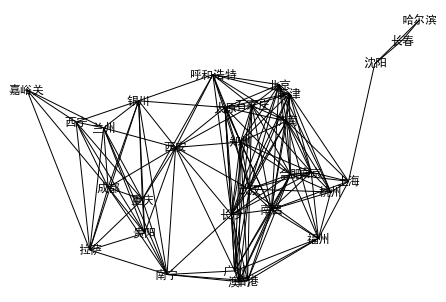

In [124]:
city_conn_graph = nx.Graph(build_connection(city_info, 700))

nx.draw(city_conn_graph, city_info, with_labels=True, node_size=0)

### Search Algorithms of Graph

#### BFS

In [294]:
def bfs(graph, start, dest):
    """
    Breadth First Search
    """
    
    pathes = [[start]]
    visited = set()

    while pathes:
        path = pathes.pop(0)

        froniter = path[-1]   # froniter node
        if froniter in visited: continue

        for successor in graph[froniter]:
            if successor in path: continue  # check loop

            new_path = path + [successor]
            pathes.append(new_path)

            if successor == dest:
                return new_path

        visited.add(froniter)

    print('No found path from %s to %s' % (start, dest))
    return None

In [203]:
city_conn_graph = nx.Graph(build_connection(city_info, 700))
bfs_search_path = bfs(city_conn_graph, '北京', '上海')

bfs_search_path

['北京', '济南', '上海']

In [127]:
def build_city_graph_with_no_conn(city_info):
    """
    Build city graph with no connection.
    """
    city_graph = {}

    for city in city_info.keys():
        city_graph[city] = []

    return city_graph

In [128]:
city_graph_with_no_conn = build_city_graph_with_no_conn(city_info)

In [490]:
def cal_path_distance(path):
    distance = 0

    for i, p in enumerate(path[:-1]):
        distance += get_city_distance(path[i], path[i+1])

    return distance

In [491]:
import copy


def draw_search_path_graph(pathes):
    """
    draw search path in city graph.
    """
    search_path_graph = copy.deepcopy(city_graph_with_no_conn)

    for i, path in enumerate(pathes[:-1]):
        search_path_graph[path] = [pathes[i+1]]

    search_path_graph = nx.Graph(search_path_graph)

    print(pathes)
    print(cal_path_distance(pathes))
    nx.draw(search_path_graph, city_info, with_labels=True, node_size=0)

['北京', '武汉', '澳门']
892.1357271583363


/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


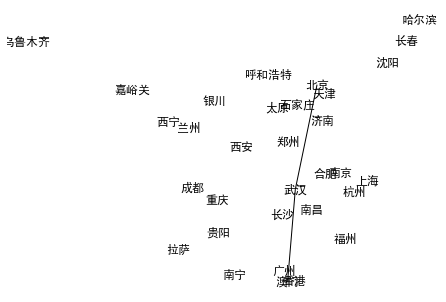

In [492]:
draw_search_path_graph(bfs_search_path)

#### DFS

In [504]:
def dfs(graph, start, dest):
    """
    Depth first search
    """
    pathes = [[start]]
    visited = set()

    while pathes:
        path = pathes.pop(0)

        froniter = path[-1]
        if froniter in visited: continue

        for successor in graph[froniter]:
            if successor in path: continue

            new_path = path + [successor]
            if successor == dest:
                return new_path

            pathes.insert(0, new_path)

        visited.add(froniter)

    print('No found path from %s to %s' % (start, dest))
    return None

In [505]:
city_connection = build_connection(city_info, 600)
city_graph = nx.Graph(city_connection)

dfs_search_path = dfs(city_graph, '北京', '上海')
dfs_search_path

['北京',
 '呼和浩特',
 '西安',
 '银川',
 '南宁',
 '澳门',
 '香港',
 '长沙',
 '太原',
 '天津',
 '南昌',
 '广州',
 '郑州',
 '合肥',
 '上海']

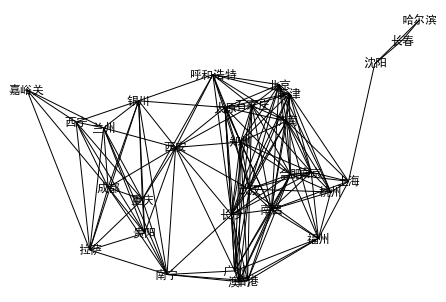

In [502]:
nx.draw(city_graph, city_info, with_labels=True, node_size=0)

['北京', '呼和浩特', '西安', '银川', '南宁', '澳门', '香港', '长沙', '太原', '天津', '南昌', '广州', '郑州', '合肥', '上海']
6044.746551457991


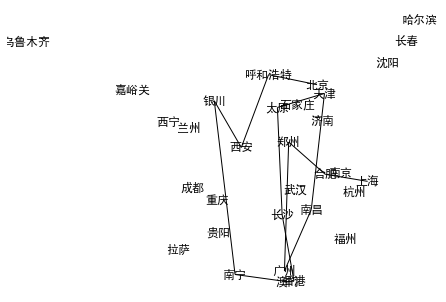

In [501]:
draw_search_path_graph(dfs_search_path,)

#### Optimal Search

In [516]:
def search(graph, start, dest, search_strategy=lambda x: x):
    """
    Breadth first search with strategy
    """
    
    pathes = [[start]]
    visited = set()

    while pathes:
        path = pathes.pop(0)

        froniter = path[-1]   # froniter node
        if froniter in visited: continue

        for successor in graph[froniter]:
            if successor in path: continue  # check loop

            new_path = path + [successor]
            pathes.append(new_path)

            if successor == dest:
                return new_path

        visited.add(froniter)

        pathes = search_strategy(pathes)


    print('No found path from %s to %s' % (start, dest))
    return None

TODO Optimize

In [526]:
def optimal_search(graph, start, destination, search_strategy):
    """
    Optimal search
    """
    pathes = [[start]]
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]

        successsors = graph[froniter]
        
        for city in successsors:
            if city in path: continue  # check loop
            
            new_path = path+[city]
            
            pathes.append(new_path)  #bfs
            
        pathes = search_strategy(pathes)

        if pathes and (destination == pathes[0][-1]):
            return pathes[0]

In [519]:
def shortest_distance(pathes):
    return sorted(pathes, key=cal_path_distance)

In [520]:
city_graph = nx.Graph(build_connection(city_info, 700))

['北京', '郑州', '澳门']
954.2089418546102
CPU times: user 53.3 ms, sys: 5.79 ms, total: 59.1 ms
Wall time: 49 ms


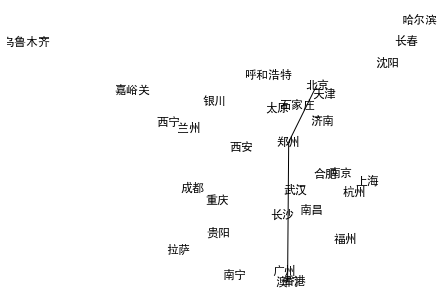

In [523]:
%time draw_search_path_graph(search(city_graph, '北京', '澳门', shortest_distance))

['北京', '武汉', '澳门']
892.1357271583363
CPU times: user 6.04 s, sys: 86.1 ms, total: 6.12 s
Wall time: 6.39 s


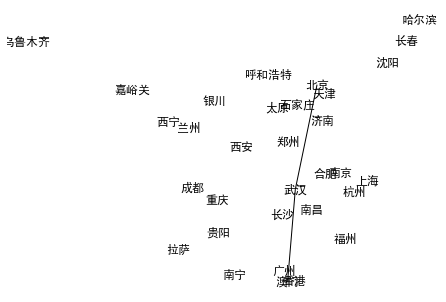

In [525]:
%time draw_search_path_graph(optimal_search(city_graph, '北京', '澳门', shortest_distance))

In [483]:
start = '北京'
dest = '澳门'

bfs_search_path = search(city_graph, start, dest)
optimal_search_path = search(city_graph, start, dest, shortest_distance)

print(bfs_search_path, optimal_search_path)
print(cal_path_distance(bfs_search_path), cal_path_distance(optimal_search_path))

['北京', '武汉', '澳门'] ['北京', '郑州', '澳门']
892.1357271583363 954.2089418546102


In [452]:
print(cal_path_distance(['北京', '武汉']))
print(cal_path_distance(['武汉','澳门']))

print(cal_path_distance(['北京', '郑州']))
print(cal_path_distance(['郑州', '澳门']))

507.1822625862953
384.95346457204107
395.55476788861756
558.6541739659926


## Machine Learning

In [542]:
%matplotlib inline

In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [614]:
dataset = load_boston()

In [615]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [616]:
dataset.data.shape, dataset.target.shape

((506, 13), (506,))

In [617]:
np.hstack([dataset.data, dataset.target.reshape((506, 1))]).shape

(506, 14)

In [618]:
df = pd.DataFrame(np.hstack([dataset.data, dataset.target.reshape((506, 1))]),
                  columns=np.hstack([dataset.feature_names, ['TARGET']]))

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [619]:
X = df['RM']
Y = df['TARGET']

X.shape, Y.shape

((506,), (506,))

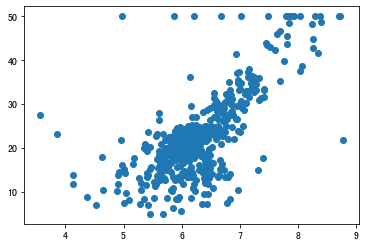

In [621]:
plt.scatter(X, Y)

### Linear Regression

#### Target Function

$$Y = k * x + b$$

In [629]:
def price(x, k, b):
    return k*x + b

#### Loss Function: Mean Square Error

$$L = \frac{1}{n} \sum{(y_i - \hat{y_i})}^2 = \frac{1}{n}\sum{(y_i - (kx_i+b))}^2$$

In [633]:
def loss(y, y_hat):
    return sum([(yi - yi_hat) ** 2 for yi, yi_hat in zip(y, y_hat)]) / len(y)

In [634]:
loss([1, 2], [1, 3])

0.5

Optimization Function: Gradient Descent

Partial Derivative: $\frac{\partial{L}}{\partial{k}}$ $\frac{\partial{L}}{\partial{b}}$

$$\frac{\partial{L}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})x_i}$$

$$\frac{\partial{L}}{\partial{k}} = -\frac{2}{n}\sum{(y_i - \hat{y_i})}$$

In [665]:
def partial_derivative_k(x, y, y_hat):
    return - 2 * sum([(yi - yi_hat) * xi for xi, yi, yi_hat in zip(x, y, y_hat)]) / len(y)


def partial_derivative_b(y, y_hat):
    return -2 * sum([(yi - yi_hat) for yi, yi_hat in zip(y, y_hat)]) / len(y)

In [698]:
import random


def train(X, Y, iter_num, learning_rate):
    
    # TODO How to choose the initial params
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    losses = []

    for i in range(iter_num):
        Y_hat = [price(xi, k, b) for xi in X]

        current_loss = loss(Y, Y_hat)
        losses.append(current_loss)

        print('Interation {}, loss {}, param k {}, param b {}'.format(i, current_loss, k, b))

        k_gradient = partial_derivative_k(X, Y, Y_hat)
        b_gradient = partial_derivative_b(Y, Y_hat)
        
        k -= learning_rate * k_gradient
        b -= learning_rate * b_gradient

    return k, b, losses

Interation 0, loss 285146.67915172805, param k -65.19689065235858, param b -99.12600670103812
Interation 1, loss 240335.70712061826, param k -58.44439995526951, param b -98.06321183310337
Interation 2, loss 202568.69015782303, param k -52.24532289720063, param b -97.08741642537488
Interation 3, loss 170738.3703197015, param k -46.55430468325697, param b -96.19149047415982
Interation 4, loss 143911.5424698615, param k -41.32970755270667, param b -95.36888831237998
Interation 5, loss 121301.69445764164, param k -36.533306150925654, param b -94.61360072049713
Interation 6, loss 102245.94805936501, param k -32.13000786701327, param b -93.9201109621684
Interation 7, loss 86185.62463407834, param k -28.087596091027375, param b -93.283354422982
Interation 8, loss 72649.86571531065, param k -24.376494512470497, param b -92.69868155698438
Interation 9, loss 61241.82832537225, param k -20.969550735599785, param b -92.16182386990987
Interation 10, loss 51627.050284742516, param k -17.841837628458

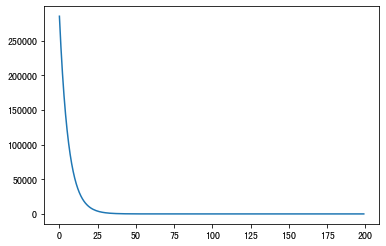

In [699]:
iter_num = 200
learning_rate = 0.001

k_best, b_best, losses = train(X, Y, iter_num, learning_rate)
plt.plot(np.arange(iter_num), losses)

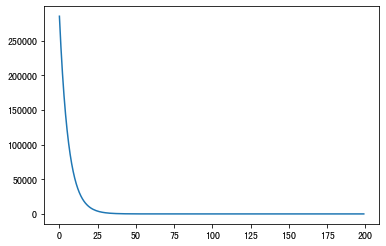

In [700]:
plt.plot(np.arange(iter_num), losses)

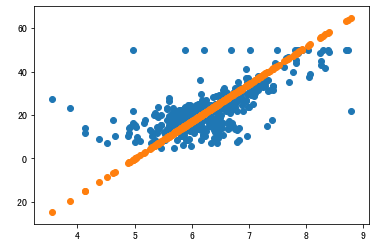

In [704]:
Y_predict = [ price(xi, k_best, b_best) for xi in X]

plt.scatter(X,Y)
plt.scatter(X, Y_predict)

## Q&A

Q: `nx.draw`显示中文问题？

A:

1. `pip3 show matplotlib` 查看matplotlib安装路径。
2. cd 到这个路径之后，继续cd 到 mpl-data/fonts/ttf 这个路径
3. 然后把 `DejaVuSans.ttf` 这个文件换成我们刚刚下在的文件。 

> SimHei.ttf 字体在当前目录下。 

## References

* *Artificial Intelligence: A Modern Approach*
* *算法导论*
* *托马斯微积分*
* *Python3 Document*
* [Python Regular Expression](https://docs.python.org/3/library/re.html)